# Modeling human movement

## Spatial features

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pointing_model import PointingModel, features, utils, learning, plotting
import matplotlib.pyplot as plt
import pandas as pd

The ```PointingModel``` class provides utilities for loading, analysing and modeling the data. 

In [3]:
pointing = PointingModel({
    # configure load parameters
    'load_default_fast': True,
    'load': {
        'loading_path': './data_export',
        # 'loading_path': './data',
    }
})

Here we define some default values for the ongoing analyis. The ```feats``` variable contains a list of the desired features.

In [4]:
target_fields = utils.target_fields()
body_fields = utils.all_body_fields()
feats = utils.spatial_features()

## Feature analysis

Plotting the correlation matrix of the base body values with the target labels. Here we can see correlations between a markerset position and a target position, which gives clues about how to engineer features.

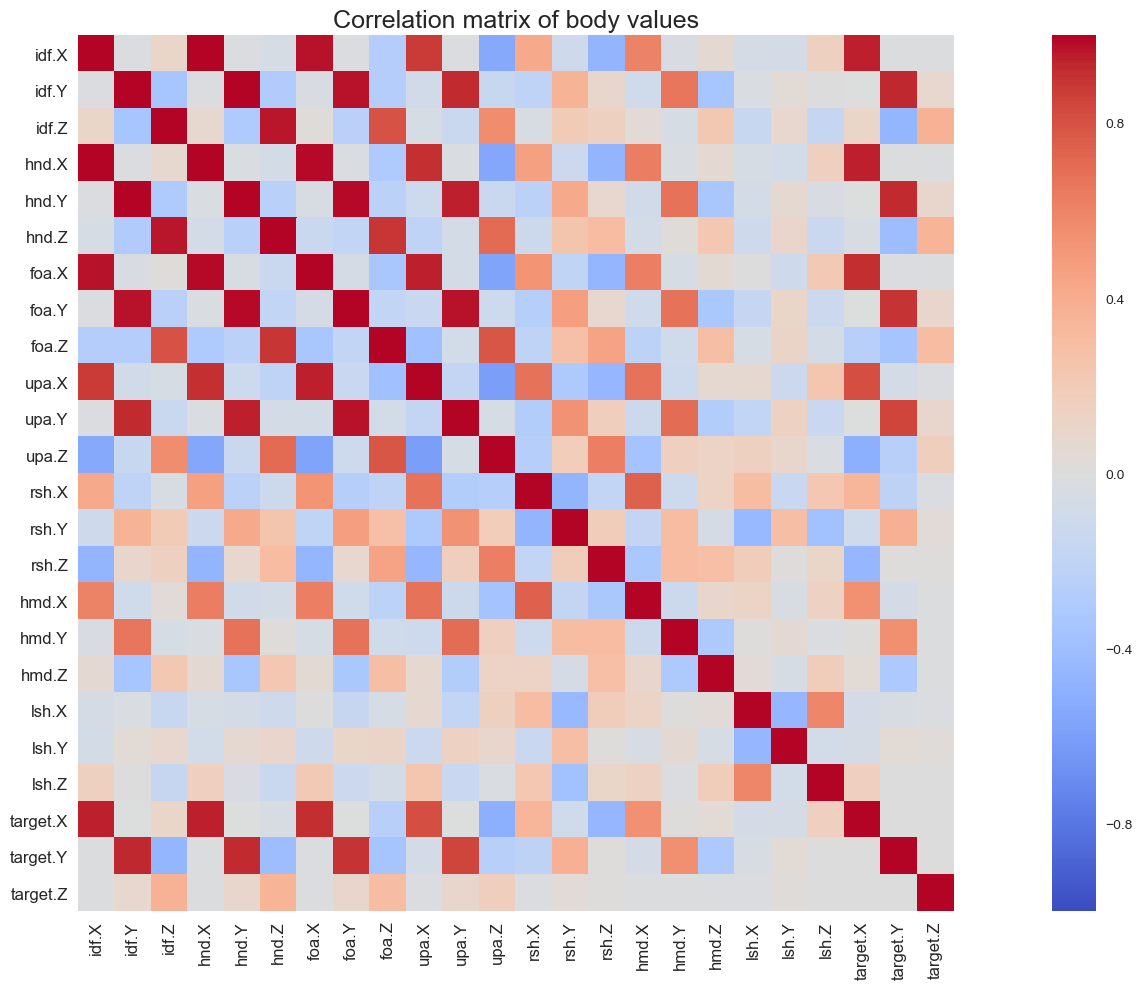

In [5]:
pointing.plot_correlation_matrix(base_fields=body_fields, force=True, additional_fields=target_fields)

Plotting the correlation matrix between the selected features and the target labels.

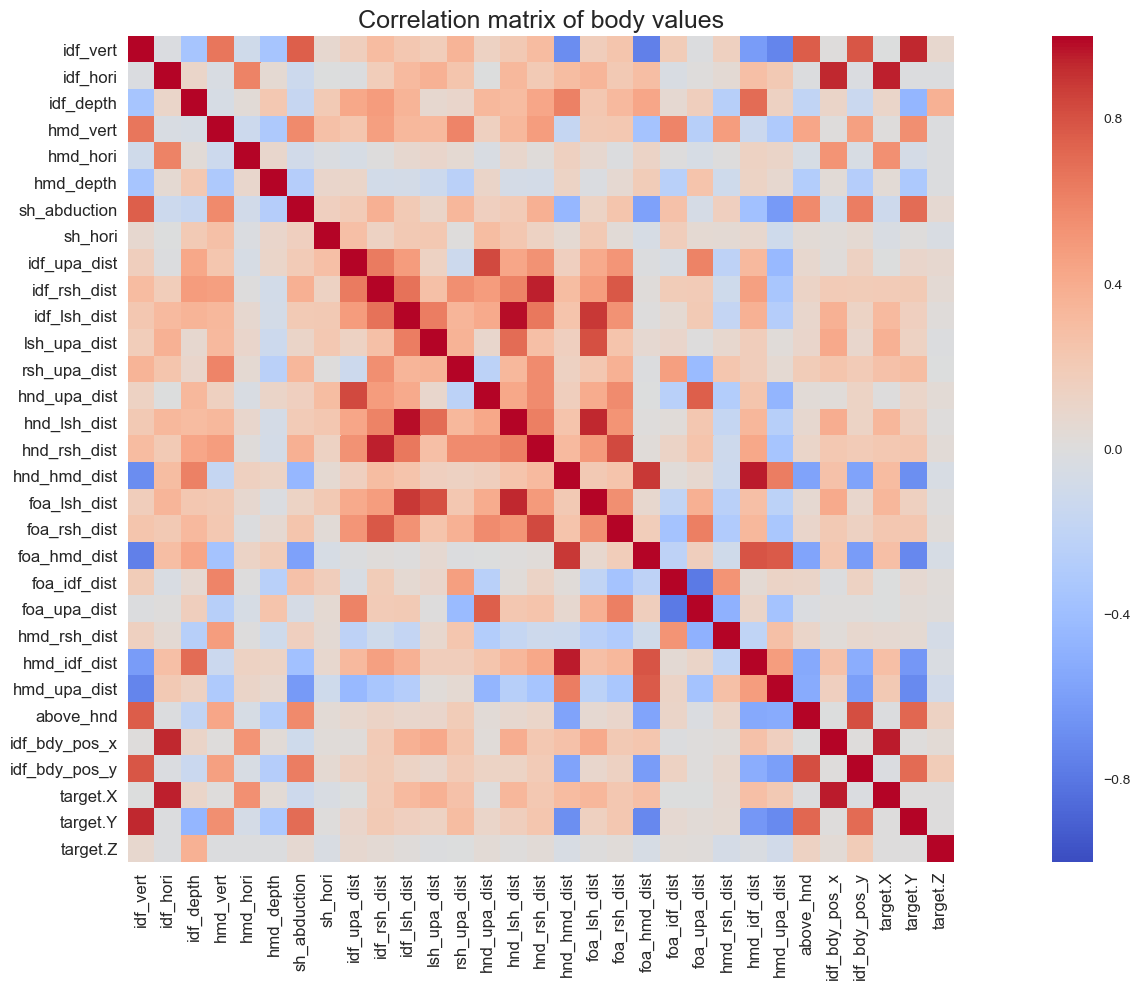

In [6]:
pointing.plot_correlation_matrix(base_fields=feats, force=True, additional_fields=target_fields)

Plotting the $\chi^2$-test between the selected features and the target labels.

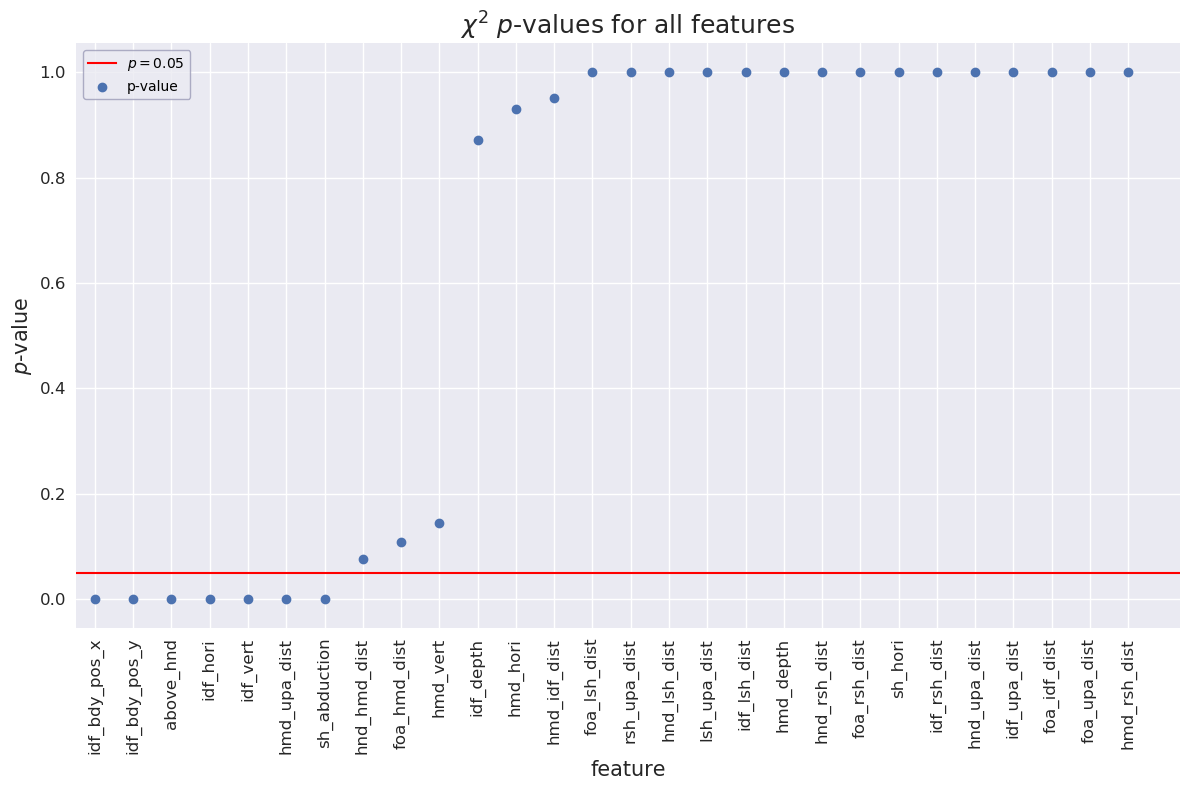

<Figure size 432x288 with 0 Axes>

In [7]:
pointing.plot_selectKBest_chi2(fields=feats, force=True)

Plotting the mutual information between the selected features and the target labels.

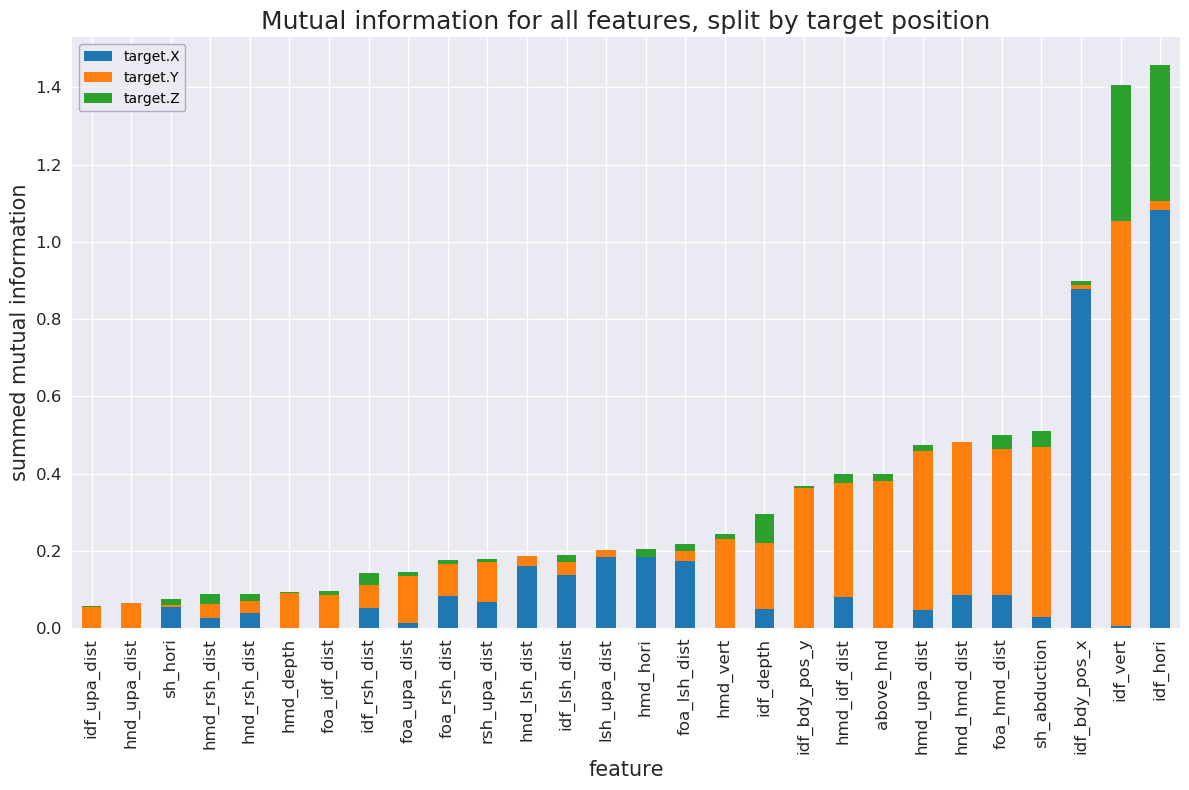

<Figure size 432x288 with 0 Axes>

In [8]:
pointing.plot_selectKBest_mutual_information(fields=feats, force=True)

Plotting feature importance, using ```sklearn.ensemple.ExtraTreesClassifier``` for computing the importance measure.

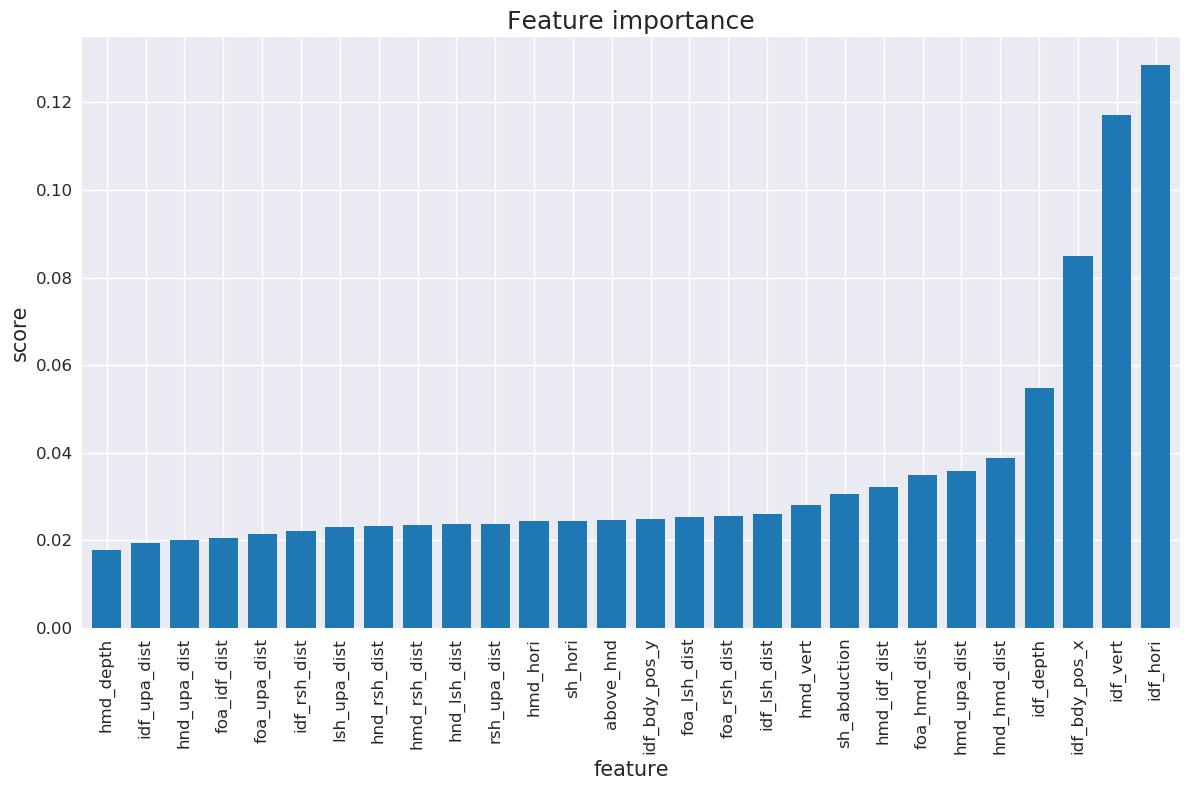

<Figure size 432x288 with 0 Axes>

In [9]:
pointing.plot_extratrees(fields=feats, force=True)

## Machine learning

### Pipeline
We first conduct a gridsearch, in order to find the best parameters for a model. Then these best parameters are used to train a model on 80% of the dataset. 20% of the data is then used to compute the test score, which we can compare against a 5-fold cross validation score obtained on first mentioned 80% of data.

### Classification

We use three different classification algorithms for comparison: Naive Bayes, SVM and random forest.

In [10]:
c_models = pointing.classification_models
c_models

[pointing_model.learning.models.svm.SupportVectorMachine,
 pointing_model.learning.models.random_forest.RandomForest,
 pointing_model.learning.models.naive_bayes.NaiveBayes]

We first conduct a gridsearch on the models to find the best performing parameters.

In [11]:
c_search = {}
for cm in c_models:
    m, p = pointing.machine_learning_gridsearch(cm, features=feats)
    c_search[m.name] = (cm, p)


****

Using:SVM
# Tuning hyper-parameters for precision
Best parameters set found on development set:
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
-----------------------
Report:
                   precision    recall  f1-score   support

(-1.0, 0.49, 1.5)       1.00      1.00      1.00        11
(-1.0, 0.49, 2.5)       1.00      1.00      1.00        17
(-1.0, 0.49, 3.5)       1.00      1.00      1.00        13
(-1.0, 1.49, 1.5)       1.00      1.00      1.00        11
(-1.0, 1.49, 2.5)       1.00      1.00      1.00         8
(-1.0, 1.49, 3.5)       1.00      1.00      1.00        13
(-1.0, 2.49, 1.5)       1.00      1.00      1.00        12
(-1.0, 2.49, 2.5)       1.00      1.00      1.00        17
(-1.0, 2.49, 3.5)       1.00      1.00      1.00        17
 (0.0, 0.49, 1.5)       1.00      1.00      1.00        13
 (0.0, 0.49, 2.5)       1.00      1.0

The best parameters are stored in a dictionary for later use in training the models.

In [12]:
c_search

{'SVM': (pointing_model.learning.models.svm.SupportVectorMachine,
  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}),
 'Random Forest': (pointing_model.learning.models.random_forest.RandomForest,
  {'criterion': 'entropy',
   'max_depth': 19,
   'max_features': 'auto',
   'n_estimators': 150,
   'random_state': 0}),
 'Naive Bayes': (pointing_model.learning.models.naive_bayes.NaiveBayes,
  {'var_smoothing': 1e-09})}

We conduct both 5-fold cross validation and testing on the dataset. The validation and training is performed on 80% of the data, while the test set consists of 20% of the data.
Below a detailed classification report for each of the models can be found.


****

Using:SVM
5-fold cross validation score: 0.839023894255211
-----------------------
Report:
                   precision    recall  f1-score   support

(-1.0, 0.49, 1.5)       0.92      1.00      0.96        11
(-1.0, 0.49, 2.5)       0.93      0.82      0.87        17
(-1.0, 0.49, 3.5)       0.76      1.00      0.87        13
(-1.0, 1.49, 1.5)       0.91      0.91      0.91        11
(-1.0, 1.49, 2.5)       0.86      0.75      0.80         8
(-1.0, 1.49, 3.5)       0.85      0.85      0.85        13
(-1.0, 2.49, 1.5)       0.85      0.92      0.88        12
(-1.0, 2.49, 2.5)       0.81      0.76      0.79        17
(-1.0, 2.49, 3.5)       0.88      0.82      0.85        17
 (0.0, 0.49, 1.5)       0.93      1.00      0.96        13
 (0.0, 0.49, 2.5)       0.93      0.81      0.87        16
 (0.0, 0.49, 3.5)       0.85      0.85      0.85        13
 (0.0, 1.49, 1.5)       0.60      0.50      0.55        12
 (0.0, 1.49, 2.5)       0.36      0.50      0.42         8
 (0.0, 1.49, 3.5

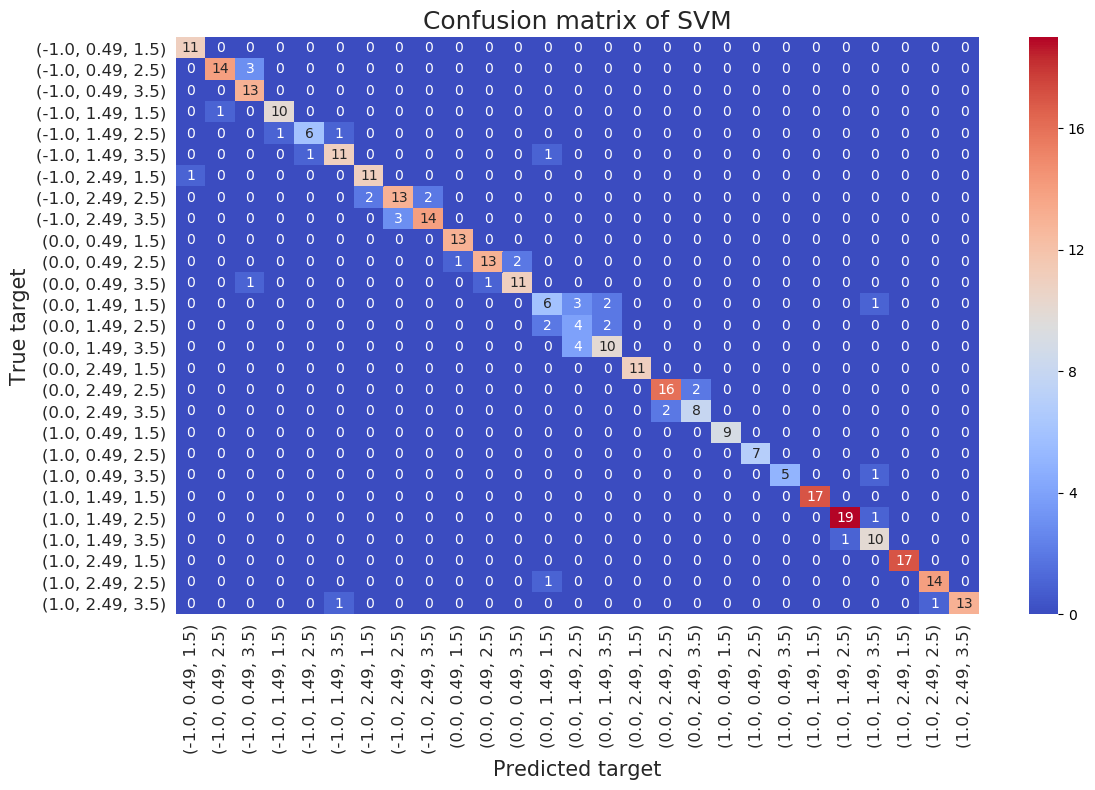

-----------------------

****

Using:Random Forest
5-fold cross validation score: 0.7428749364514489
-----------------------
Report:
                   precision    recall  f1-score   support

(-1.0, 0.49, 1.5)       0.85      1.00      0.92        11
(-1.0, 0.49, 2.5)       0.85      0.65      0.73        17
(-1.0, 0.49, 3.5)       0.62      0.77      0.69        13
(-1.0, 1.49, 1.5)       0.85      1.00      0.92        11
(-1.0, 1.49, 2.5)       0.33      0.38      0.35         8
(-1.0, 1.49, 3.5)       0.55      0.46      0.50        13
(-1.0, 2.49, 1.5)       0.71      0.83      0.77        12
(-1.0, 2.49, 2.5)       0.52      0.65      0.58        17
(-1.0, 2.49, 3.5)       0.80      0.47      0.59        17
 (0.0, 0.49, 1.5)       0.81      1.00      0.90        13
 (0.0, 0.49, 2.5)       0.91      0.62      0.74        16
 (0.0, 0.49, 3.5)       0.71      0.92      0.80        13
 (0.0, 1.49, 1.5)       0.70      0.58      0.64        12
 (0.0, 1.49, 2.5)       0.27      0.38  

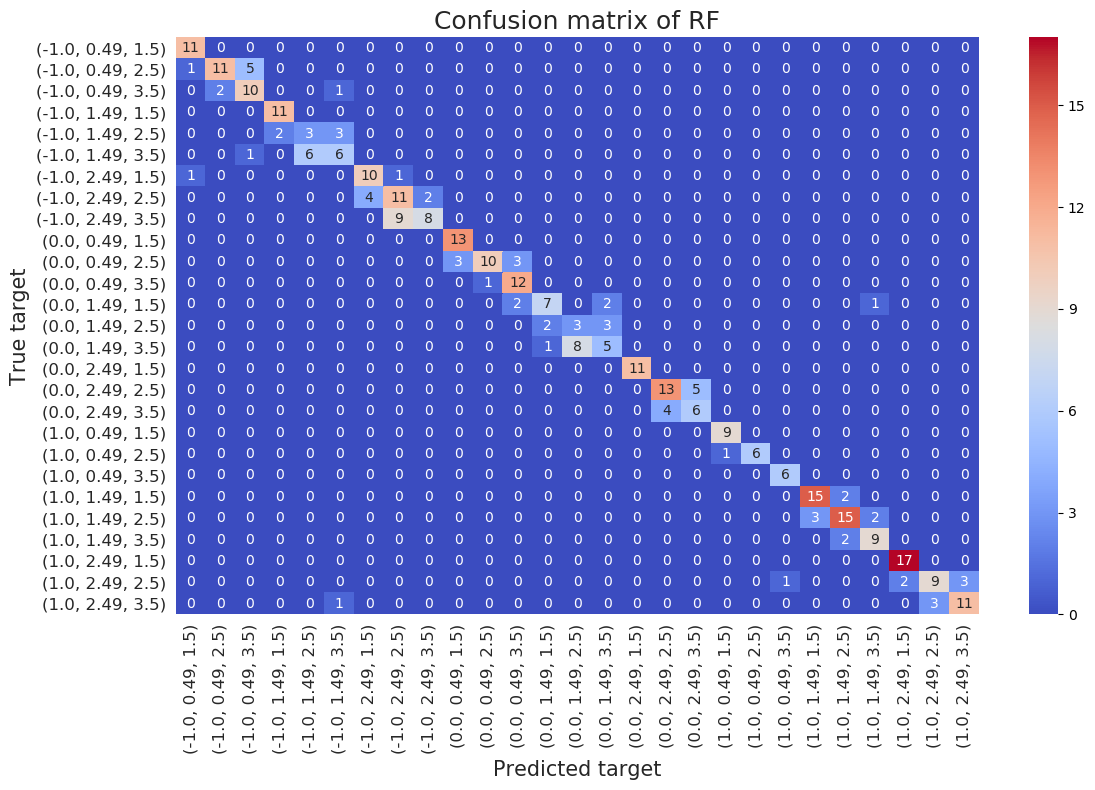

-----------------------

****

Using:Naive Bayes
5-fold cross validation score: 0.4900127097102186
-----------------------
Report:
                   precision    recall  f1-score   support

(-1.0, 0.49, 1.5)       0.41      1.00      0.58        11
(-1.0, 0.49, 2.5)       0.00      0.00      0.00        17
(-1.0, 0.49, 3.5)       0.36      0.31      0.33        13
(-1.0, 1.49, 1.5)       0.20      0.18      0.19        11
(-1.0, 1.49, 2.5)       0.07      0.25      0.11         8
(-1.0, 1.49, 3.5)       0.43      0.23      0.30        13
(-1.0, 2.49, 1.5)       0.32      0.92      0.48        12
(-1.0, 2.49, 2.5)       1.00      0.06      0.11        17
(-1.0, 2.49, 3.5)       0.71      0.29      0.42        17
 (0.0, 0.49, 1.5)       0.45      1.00      0.62        13
 (0.0, 0.49, 2.5)       0.00      0.00      0.00        16
 (0.0, 0.49, 3.5)       0.43      0.23      0.30        13
 (0.0, 1.49, 1.5)       0.00      0.00      0.00        12
 (0.0, 1.49, 2.5)       0.15      0.50    

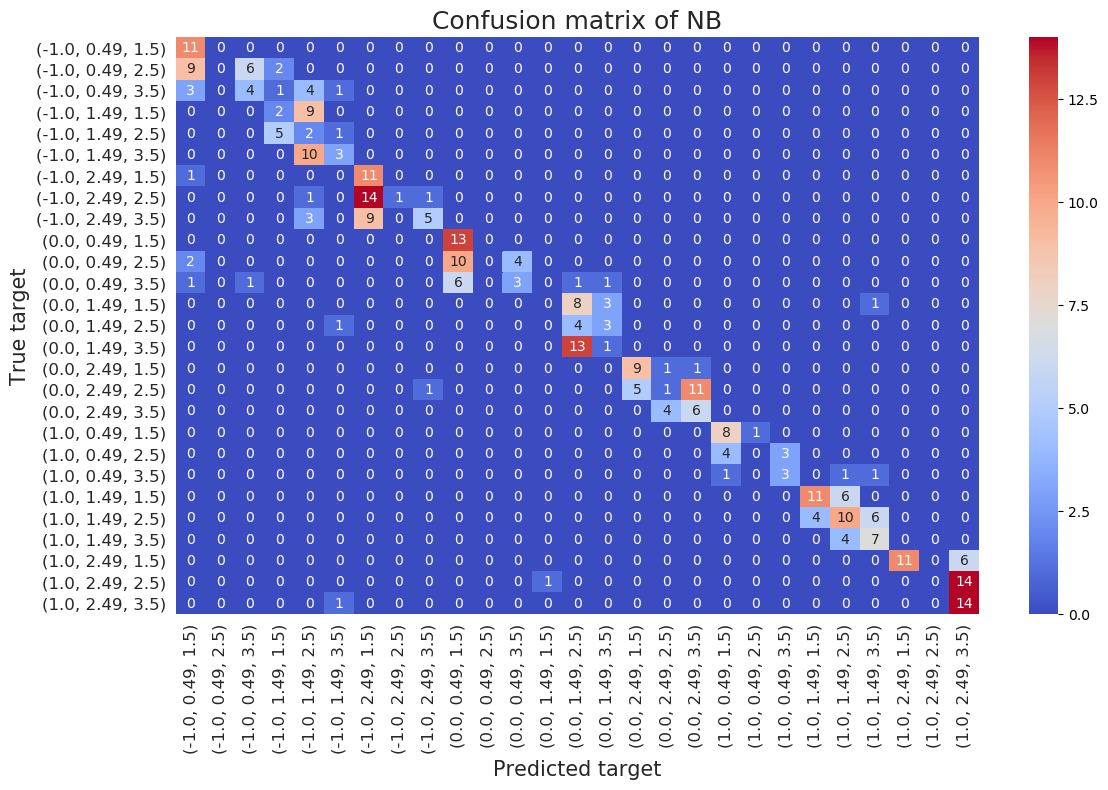

-----------------------


In [13]:
c_scores = {}
for k in c_search:
    cm, p = c_search[k]
    m, s = pointing.machine_learning_kfold(cm, model_kwargs=p, cleanup=True, save=False, features=feats)
    c_scores[m.name] = s

At the end we compare the different scores and find the best performing model.

In [14]:
pd.DataFrame.from_dict(c_scores).T

,cross-validation,accuracy,f1-score
SVM,0.839024,0.871795,0.865540
Random Forest,0.742875,0.735043,0.731210
Naive Bayes,0.490013,0.398860,0.344157


### Regression

Also for regression we compare three different models: Linear Regression, SVM and random forest.

In [15]:
 r_models = pointing.regression_models
 r_models

[pointing_model.learning.models.svm.SupportVectorMachineRegression,
 pointing_model.learning.models.random_forest.RandomForestRegression,
 pointing_model.learning.models.linear_regression.LinearRegression]

We first conduct a gridsearch on the models to find the best performing parameters.

In [16]:
r_search = {'Linear Regression': (learning.LinearRegression, {})}
for rm in r_models:
    m, p = pointing.machine_learning_gridsearch(rm, features=feats)
    r_search[m.name] = (rm, p)


****

Using:SVM
# Tuning hyper-parameters
Best parameters set found on development set:
{'estimator__C': 10.0, 'estimator__gamma': 0.01, 'estimator__kernel': 'rbf'}

Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
-----------------------
distances:
                               pred              dist
                                  x     y     z      
(true, x) (true, y) (true, z)                        
-1.0      0.49      1.5       -1.01  0.48  1.42  0.16
                    2.5       -1.02  0.47  2.57  0.20
                    3.5       -0.86  0.60  2.93  0.64
          1.49      1.5       -1.11  1.48  1.91  0.43
                    2.5       -0.96  1.52  2.59  0.23
                    3.5       -0.90  1.55  3.10  0.44
          2.49      1.5       -1.02  2.51  1.51  0.16
                    2.5       -0.94  2.45  2.47  0.16
                    3.5       -0.84  2.41  3.07  0.50
 0.0      0.49  

AttributeError: 'MultiOutputRegressor' object has no attribute 'best_params_'

The best parameters are stored in a dictionary for later use in training the models.

In [17]:
r_search

{'SVM': (pointing_model.learning.models.svm.SupportVectorMachineRegression,
  {'estimator__C': 10.0,
   'estimator__gamma': 0.01,
   'estimator__kernel': 'rbf'}),
 'Random Forest Regression': (pointing_model.learning.models.random_forest.RandomForestRegression,
  {'criterion': 'mae',
   'max_depth': 16,
   'max_features': 'auto',
   'n_estimators': 100,
   'random_state': 0}),
 'Linear Regression': (pointing_model.learning.models.linear_regression.LinearRegression,
  {})}

We conduct both 5-fold cross validation and testing on the dataset. The validation and training is performed on 80% of the data, while the test set consists of 20% of the data.
Below a detailed classification report for each of the models can be found.


****

Using:SVM
5-fold cross validation score: 0.31346718201753704

Description of distances:
count    27.000000
mean      0.278768
std       0.290841
min       0.022151
25%       0.142134
50%       0.199217
75%       0.322481
max       1.523286
Name: (dist, real_mean), dtype: float64



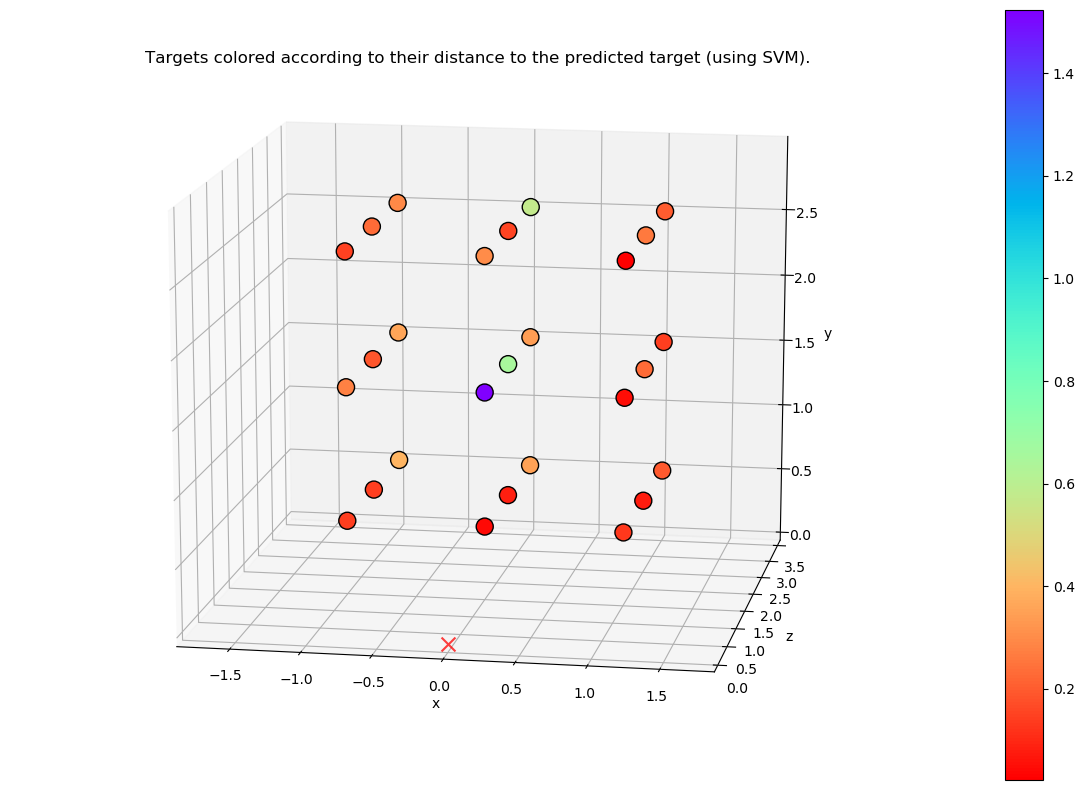

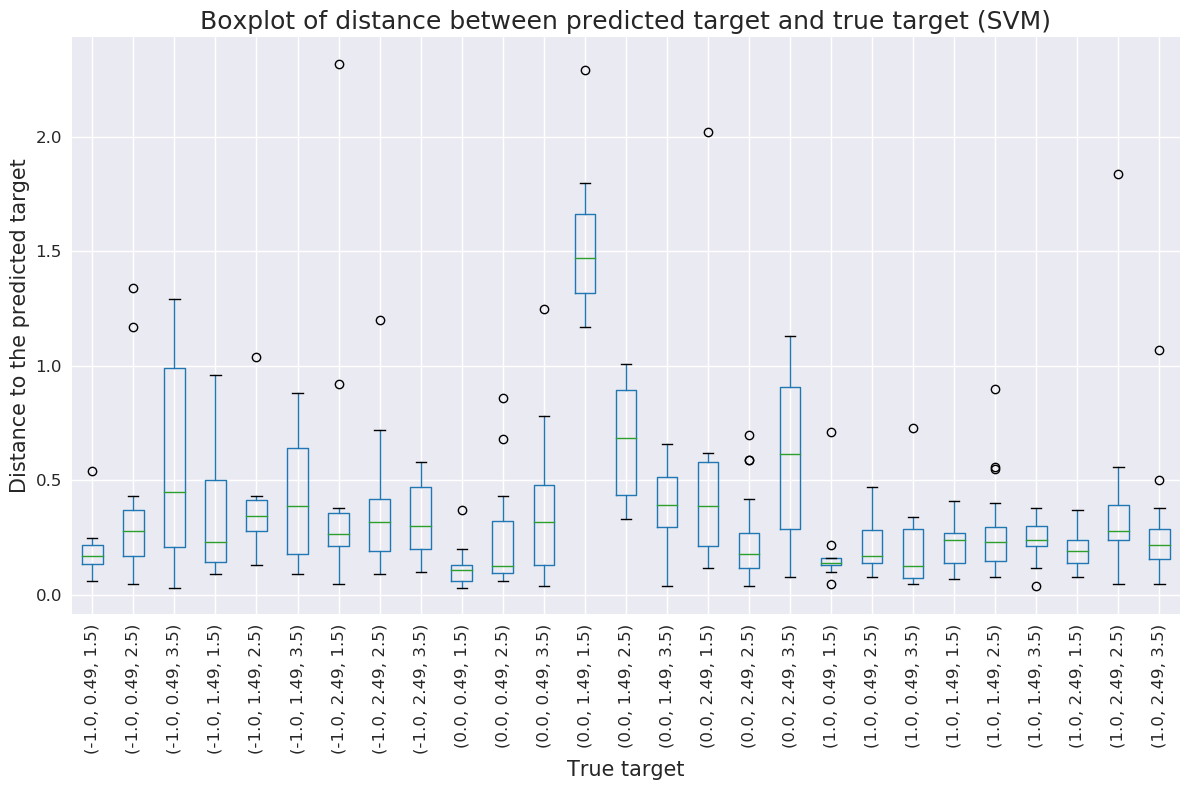

-----------------------
distances:
                               pred              dist
                                  x     y     z      
(true, x) (true, y) (true, z)                        
-1.0      0.49      1.5       -1.00  0.50  1.36  0.20
                    2.5       -1.02  0.43  2.63  0.36
                    3.5       -0.90  0.55  3.11  0.57
          1.49      1.5       -1.14  1.46  1.74  0.36
                    2.5       -1.03  1.51  2.68  0.40
                    3.5       -0.93  1.44  3.15  0.42
          2.49      1.5       -0.89  2.39  1.54  0.47
                    2.5       -0.95  2.46  2.72  0.37
                    3.5       -0.88  2.42  3.24  0.32
 0.0      0.49      1.5       -0.03  0.46  1.50  0.12
                    2.5        0.02  0.51  2.42  0.24
                    3.5       -0.05  0.58  3.16  0.39
          1.49      1.5       -0.00  1.39  3.02  1.54
                    2.5       -0.08  1.42  3.14  0.67
                    3.5       -0.02  1.60  3.18

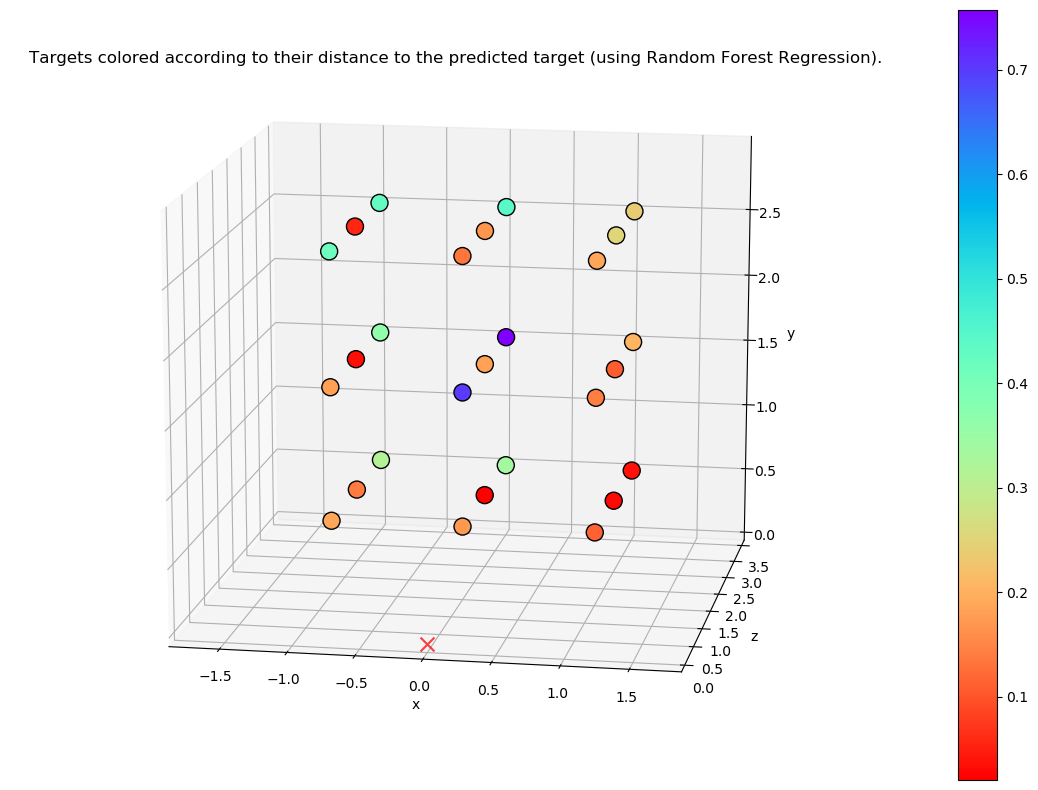

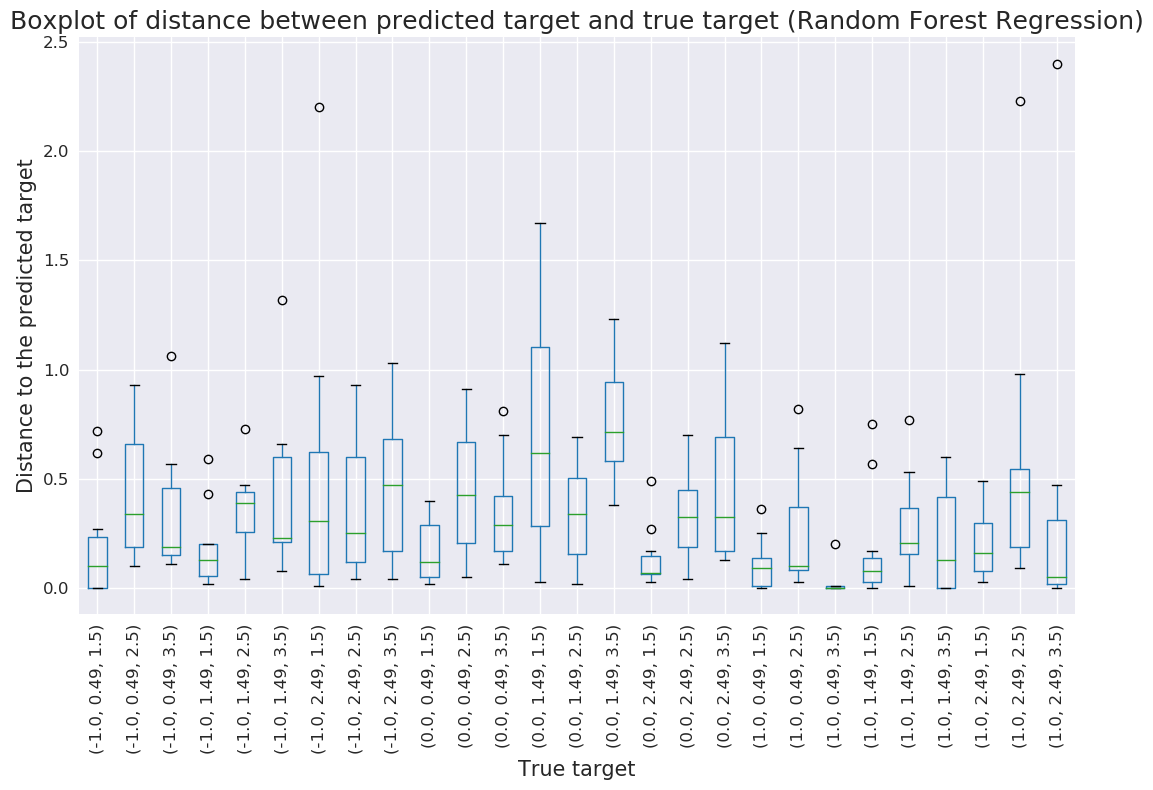

-----------------------
distances:
                               pred              dist
                                  x     y     z      
(true, x) (true, y) (true, z)                        
-1.0      0.49      1.5       -1.00  0.49  1.69  0.19
                    2.5       -1.00  0.50  2.64  0.44
                    3.5       -1.00  0.56  3.20  0.34
          1.49      1.5       -1.00  1.48  1.68  0.18
                    2.5       -1.00  1.49  2.53  0.36
                    3.5       -1.00  1.41  3.14  0.39
          2.49      1.5       -1.00  2.32  1.88  0.49
                    2.5       -1.00  2.49  2.44  0.36
                    3.5       -1.00  2.47  3.07  0.44
 0.0      0.49      1.5        0.00  0.50  1.67  0.17
                    2.5        0.00  0.50  2.52  0.44
                    3.5        0.00  0.55  3.17  0.35
          1.49      1.5        0.02  1.45  2.20  0.71
                    2.5        0.00  1.49  2.68  0.34
                    3.5        0.00  1.49  2.74

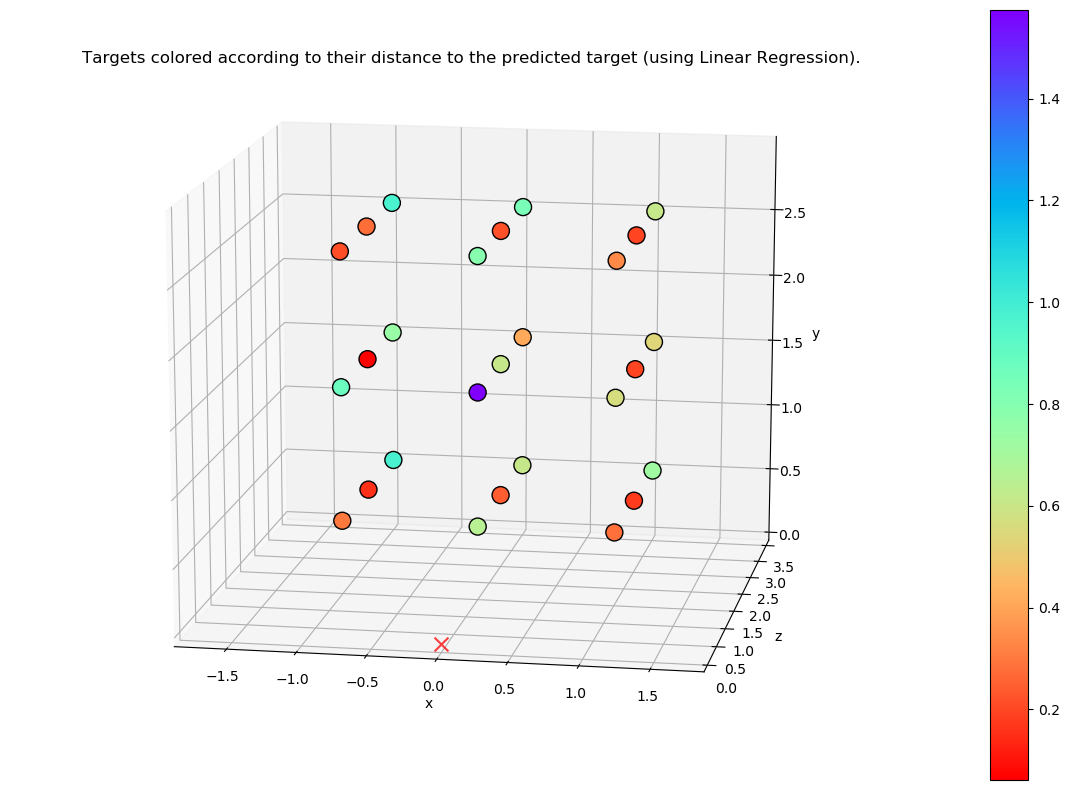

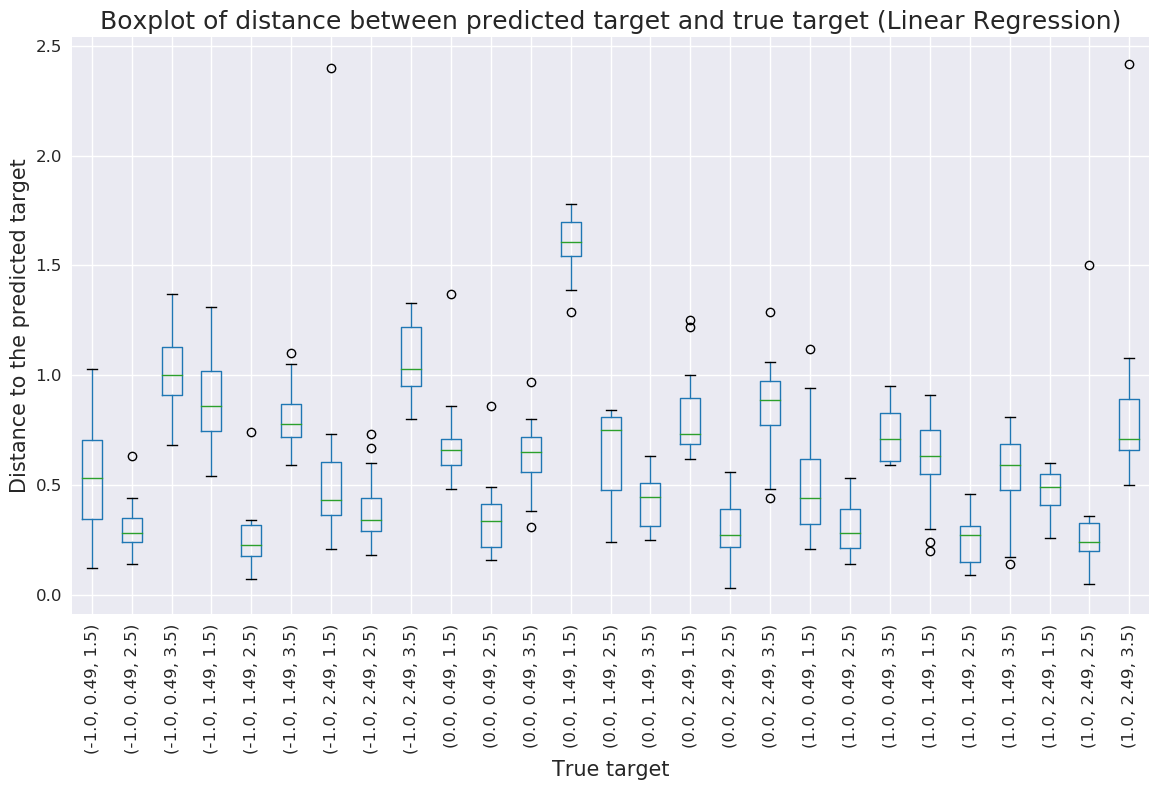

-----------------------
distances:
                               pred              dist
                                  x     y     z      
(true, x) (true, y) (true, z)                        
-1.0      0.49      1.5       -1.13  0.42  1.76  0.53
                    2.5       -0.99  0.65  2.48  0.31
                    3.5       -0.80  0.84  2.60  1.03
          1.49      1.5       -1.15  1.53  2.37  0.89
                    2.5       -0.95  1.50  2.53  0.28
                    3.5       -0.75  1.50  2.80  0.81
          2.49      1.5       -0.97  2.48  1.71  0.61
                    2.5       -0.89  2.33  2.31  0.38
                    3.5       -0.70  2.21  2.61  1.05
 0.0      0.49      1.5       -0.04  0.05  1.98  0.70
                    2.5       -0.04  0.51  2.74  0.35
                    3.5       -0.06  0.74  2.95  0.63
          1.49      1.5        0.02  1.33  3.07  1.59
                    2.5       -0.08  1.39  3.10  0.63
                    3.5       -0.04  1.46  3.09

In [18]:
r_scores = {}
for k in r_search:
    cm, p = r_search[k]
    p = {i.replace('estimator__', ''): p[i] for i in p}
    m, s = pointing.machine_learning_kfold(
        cm, model_kwargs=p, cleanup=True, features=feats,
        analyze_distances=plotting.analyze_distances, save=False
    )
    r_scores[m.name] = s

At the end we compare the different scores and find the best performing model.

In [19]:
pd.DataFrame.from_dict(r_scores).T

,cross-validation,mean_distance,rmse
SVM,0.313467,0.278768,0.305960
Random Forest Regression,0.264978,0.235556,0.278854
Linear Regression,0.462510,0.525304,0.412959
